### training data

* 4 columns
* 74 form

* label
    * 0: 
    * 1: 
    * 2: 
    * 3: 
 



#Ref
https://www.kaggle.com/marcovasquez/basic-nlp-with-tensorflow-and-wordcloud



In [1]:
import pandas as pd
import numpy as np

from wordcloud import WordCloud, STOPWORDS
import squarify    # pip install squarify (algorithm for treemap)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.metrics import precision_score, recall_score, f1_score


In [5]:
train=pd.read_csv("./input/training.tsv", sep='\t')
train.info()
test=pd.read_csv("./input/test.tsv", sep='\t')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65963 entries, 0 to 65962
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sid       65963 non-null  object
 1   sentence  65963 non-null  object
 2   html_id   65963 non-null  object
 3   label     65963 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 2.0+ MB


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


29621    687
33184    317
35017    356
53977    345
Name: lens, dtype: int64

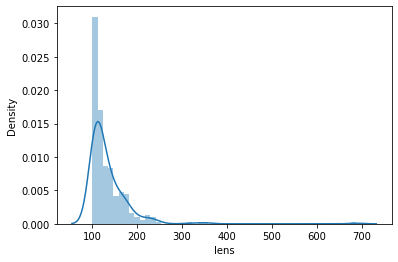

In [4]:
df['lens']=df['sentence'].apply(lambda x:len(str(x).split()))
sns.distplot(df[df['lens']>100]['lens'])
df[df['lens']>300]['lens']
# most are under 300. one outlier with 687.. 

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


2425     491
5580     357
24085    322
24744    322
26977    462
Name: lens, dtype: int64

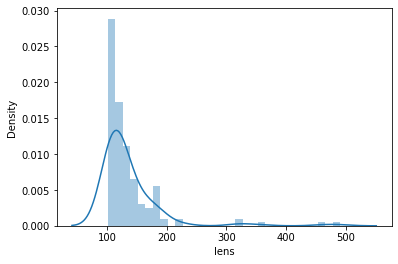

In [6]:
test['lens']=test['sentence'].apply(lambda x:len(str(x).split()))
sns.distplot(test[test['lens']>100]['lens'])
test[test['lens']>300]['lens']
# most are under 300. one outlier with 687.. 

In [4]:
test=pd.read_csv("./input/test.tsv", sep='\t')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28437 entries, 0 to 28436
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sid       28437 non-null  object
 1   sentence  28437 non-null  object
 2   html_id   28437 non-null  object
dtypes: object(3)
memory usage: 666.6+ KB


In [25]:
from sklearn.model_selection import GroupKFold
X = df['sentence']
y = df['label']
groups = df['html_id']
group_kfold = GroupKFold(n_splits=2)
group_kfold.get_n_splits(X, y, groups)

print(group_kfold)

for train_index, test_index in group_kfold.split(X, y, groups):
    print(df.iloc[train_index]['html_id'].value_counts())
    print("------")
    print(df.iloc[test_index]['html_id'].value_counts())
    print("---||||||---")



GroupKFold(n_splits=2)
Form10k_34    3335
Form10k_01    3328
Form10k_12    2844
Form10k_15    2706
Form10k_14    2501
Form10k_08    2396
Form10k_25    2232
Form10k_59    1995
Form10k_30    1905
Form10k_57    1663
Form10k_73    1554
Form10k_38    1500
Form10k_64    1098
Form10k_60     924
Form10k_33     871
Form10k_75     772
Form10k_26     758
Form10k_07     513
Name: html_id, dtype: int64
------
Form10k_04    4817
Form10k_74    3070
Form10k_23    2823
Form10k_65    2582
Form10k_58    2477
Form10k_27    2331
Form10k_63    2018
Form10k_05    1951
Form10k_24    1759
Form10k_47    1634
Form10k_31    1530
Form10k_55    1459
Form10k_44    1077
Form10k_68     900
Form10k_22     867
Form10k_37     771
Form10k_17     534
Form10k_61     468
Name: html_id, dtype: int64
---||||||---
Form10k_04    4817
Form10k_74    3070
Form10k_23    2823
Form10k_65    2582
Form10k_58    2477
Form10k_27    2331
Form10k_63    2018
Form10k_05    1951
Form10k_24    1759
Form10k_47    1634
Form10k_31    1530
Form10k_

In [8]:
df['html_id'].value_counts()

Form10k_04    4817
Form10k_34    3335
Form10k_01    3328
Form10k_74    3070
Form10k_12    2844
Form10k_23    2823
Form10k_15    2706
Form10k_65    2582
Form10k_14    2501
Form10k_58    2477
Form10k_08    2396
Form10k_27    2331
Form10k_25    2232
Form10k_63    2018
Form10k_59    1995
Form10k_05    1951
Form10k_30    1905
Form10k_24    1759
Form10k_57    1663
Form10k_47    1634
Form10k_73    1554
Form10k_31    1530
Form10k_38    1500
Form10k_55    1459
Form10k_64    1098
Form10k_44    1077
Form10k_60     924
Form10k_68     900
Form10k_33     871
Form10k_22     867
Form10k_75     772
Form10k_37     771
Form10k_26     758
Form10k_17     534
Form10k_07     513
Form10k_61     468
Name: html_id, dtype: int64

In [34]:
def Plot_world(text,filename):
    
    comment_words = ' '
    stopwords = set(STOPWORDS) 
    
    for val in text: 

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 

        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        for words in tokens: 
            comment_words = comment_words + words + ' '


    wordcloud = WordCloud(width = 5000, height = 4000, 
                    background_color ='black', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(comment_words) 

    # plot the WordCloud image                        
    plt.figure(figsize = (12, 12), facecolor = 'k', edgecolor = 'k' ) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.savefig(filename)
    plt.show() 
    

In [ ]:
# 0: Other
# 1: Green
othertxt= df.loc[df['label']==1]['sentence'].values
Plot_world(othertxt,"green.png")
# 2: Environmental
# 3: Social

In [ ]:
# 0: Other
# 2: Environmental
environmentaltxt= df.loc[df['label']==2]['sentence'].values
Plot_world(environmentaltxt,"Environmental.png")



In [ ]:
# 3: Social
socailTxt= df.loc[df['label']==3]['sentence'].values
Plot_world(socailTxt,"Social.png")


In [ ]:
# 0: Other
otherTxt= df.loc[df['label']==0]['sentence'].values
Plot_world(otherTxt,"Other.png")



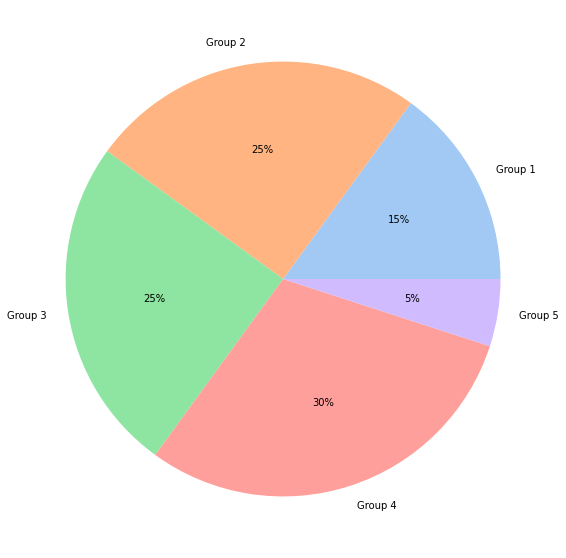

In [79]:
#define data
plt.figure(figsize=(30,10))
data = [15, 25, 25, 30, 5]
labels = ['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()


In [ ]:
trainori=pd.read_csv("../input/training.tsv", sep='\t')
train=pd.read_csv("submission.tsv", sep='\t')
train['html_id']=trainori['html_id']


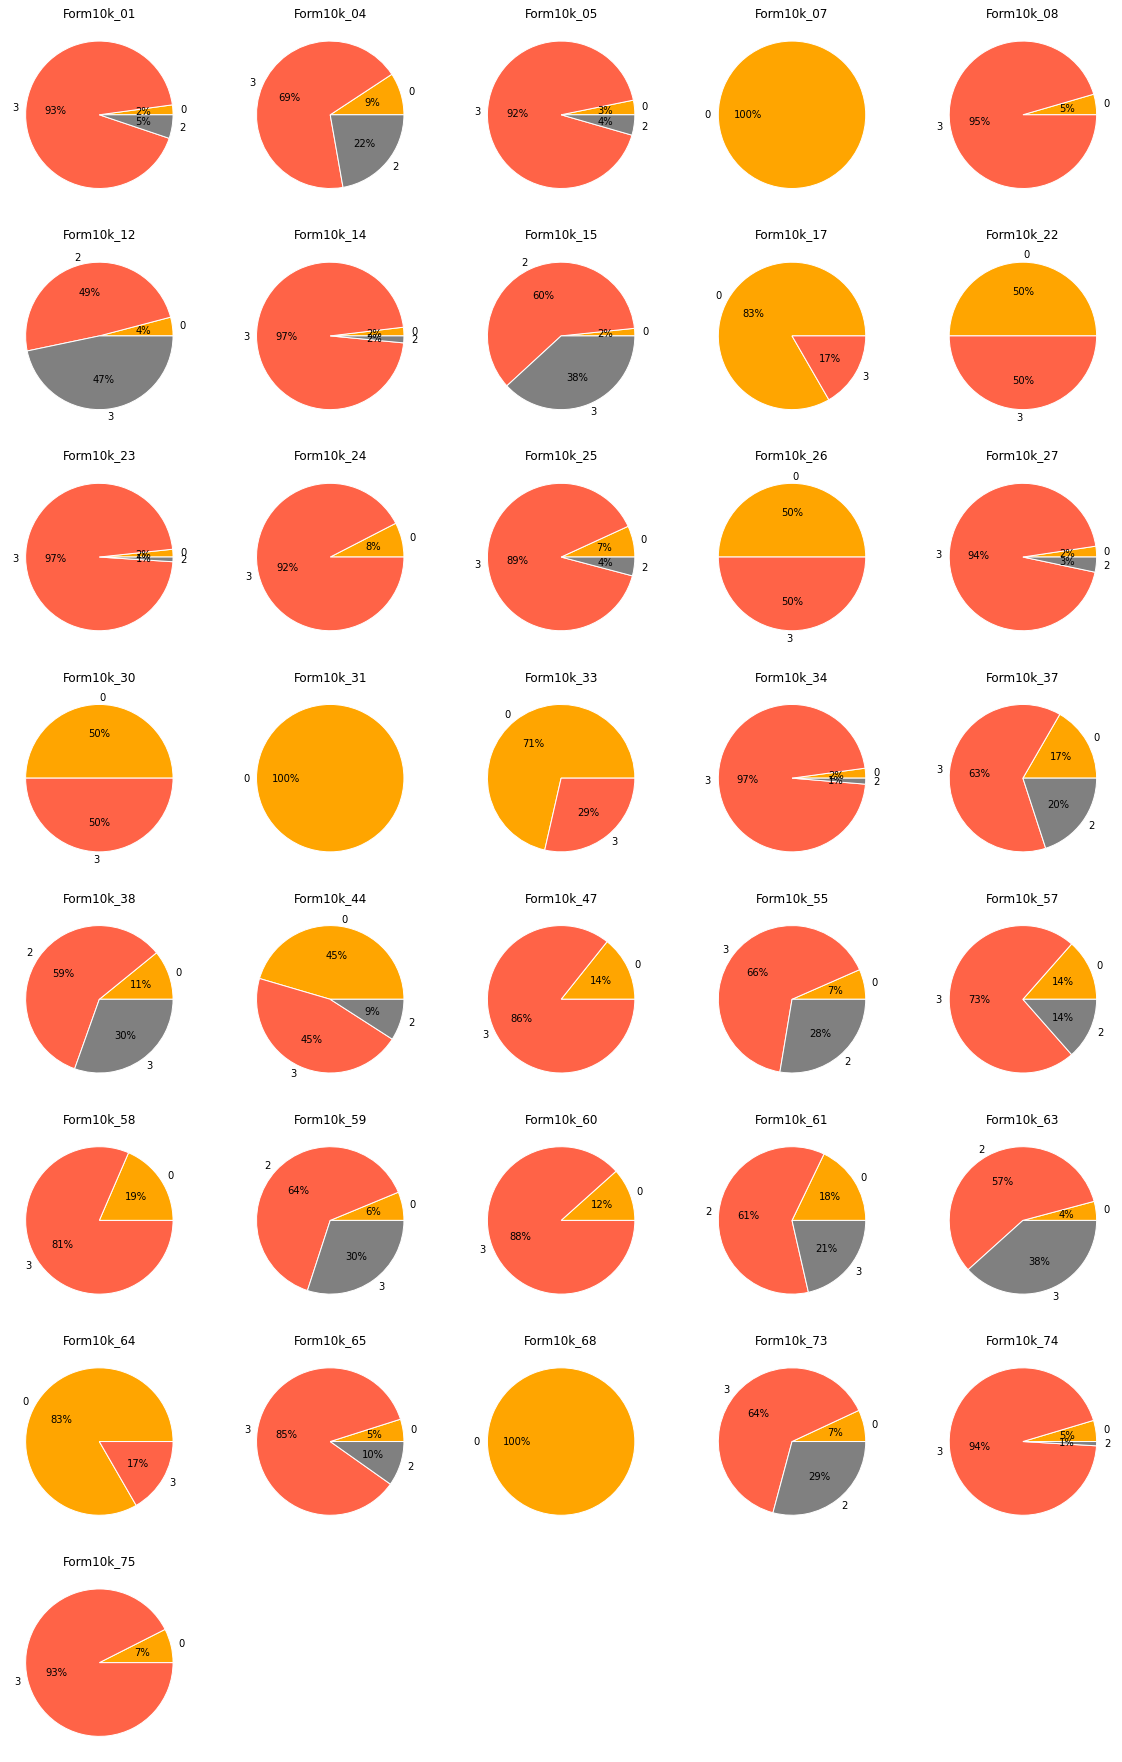

In [17]:
plt.figure(figsize=(20, 40))
row, col = 5, 10
# for i in range(row * col):
#     plt.subplot(col, row, i+1)
#     plt.title(f"target: {target}")
# plt.show()
colors = ["orange", "tomato", "gray", "peru"]

i=0
for name, group in train.groupby(by=['html_id']):
    
    plt.subplot(col, row, i+1)
    plt.title(name)
    data=group['0'].value_counts()
    data.iloc[0]=5

    plt.pie(data, labels=data.index, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' },colors=colors,autopct='%.0f%%')
    i=i+1
plt.show()
    

Form10k_01


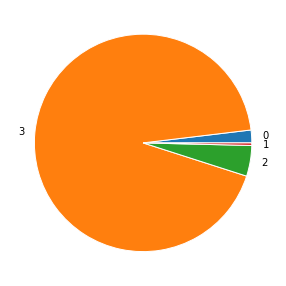

_______
Form10k_04


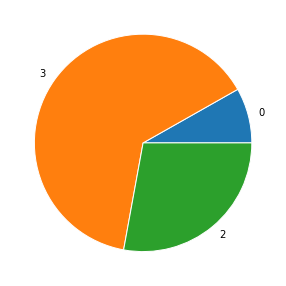

_______
Form10k_05


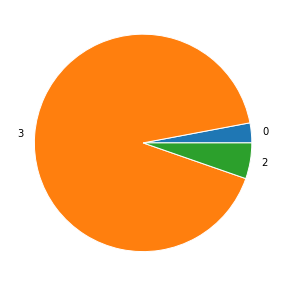

_______
Form10k_07


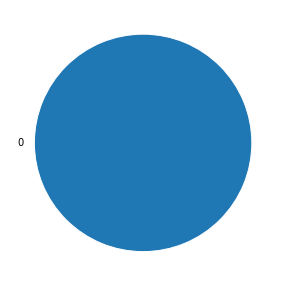

_______
Form10k_08


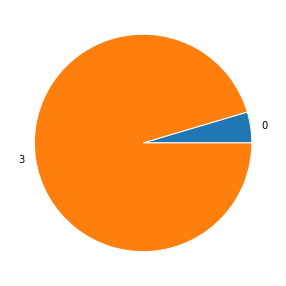

_______
Form10k_12


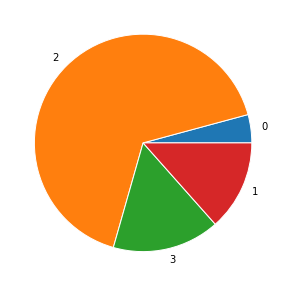

_______
Form10k_14


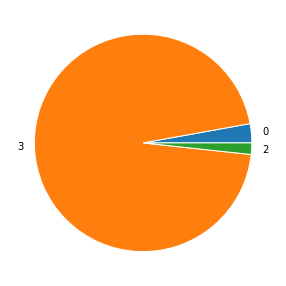

_______
Form10k_15


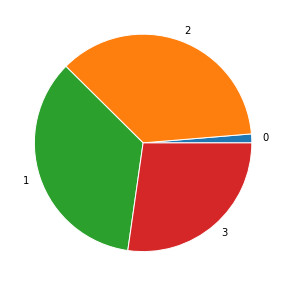

_______
Form10k_17


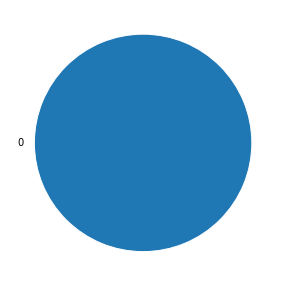

_______
Form10k_22


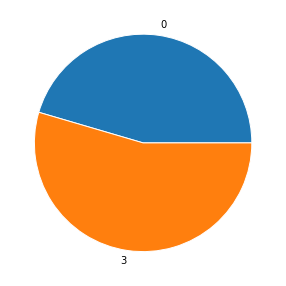

_______
Form10k_23


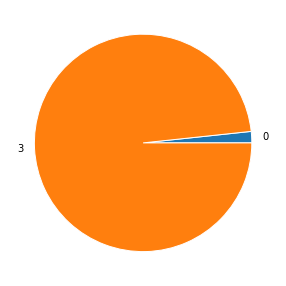

_______
Form10k_24


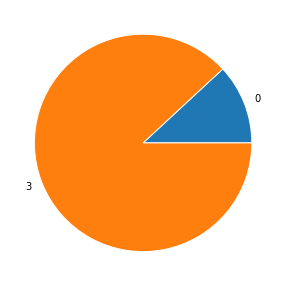

_______
Form10k_25


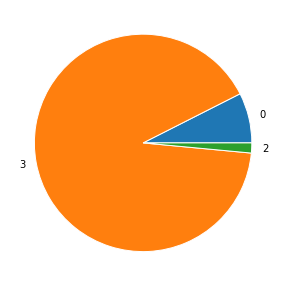

_______
Form10k_26


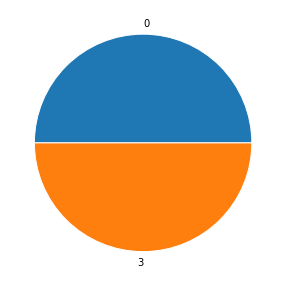

_______
Form10k_27


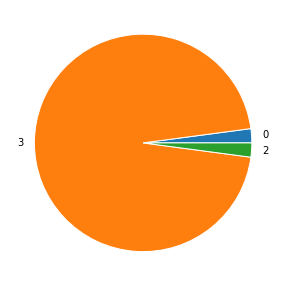

_______
Form10k_30


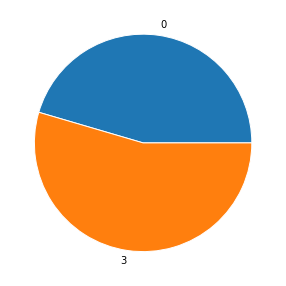

_______
Form10k_31


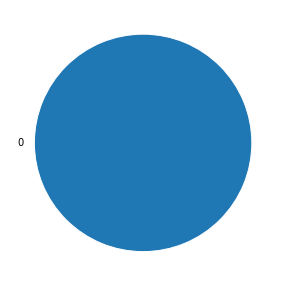

_______
Form10k_33


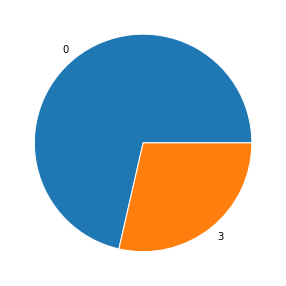

_______
Form10k_34


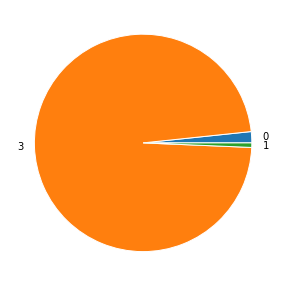

_______
Form10k_37


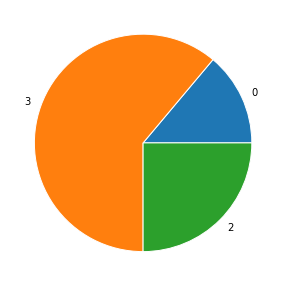

_______
Form10k_38


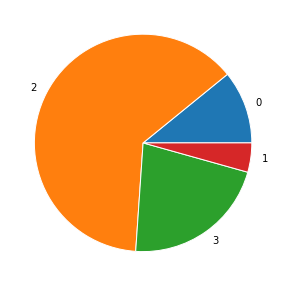

_______
Form10k_44


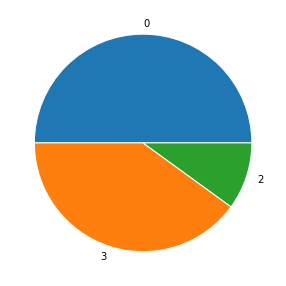

_______
Form10k_47


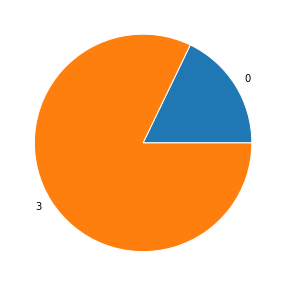

_______
Form10k_55


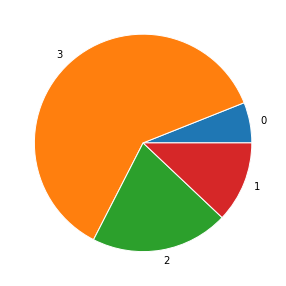

_______
Form10k_57


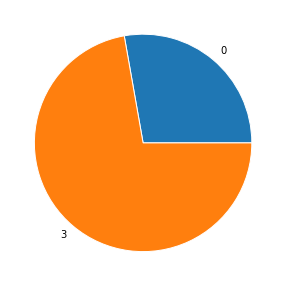

_______
Form10k_58


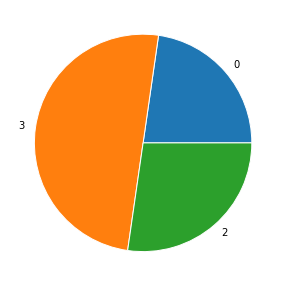

_______
Form10k_59


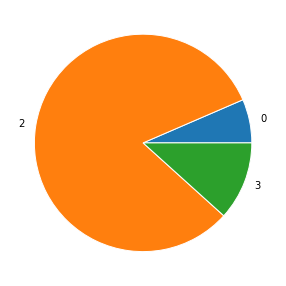

_______
Form10k_60


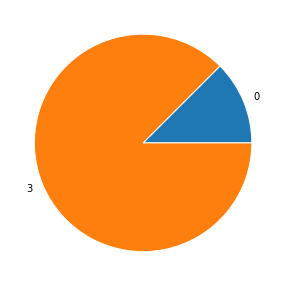

_______
Form10k_61


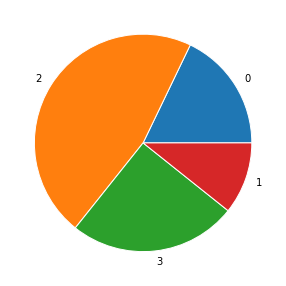

_______
Form10k_63


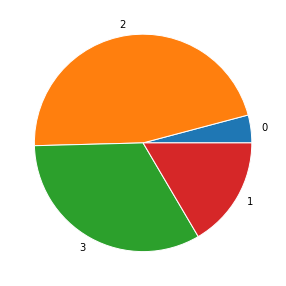

_______
Form10k_64


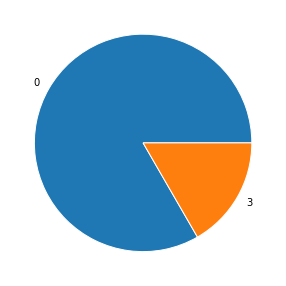

_______
Form10k_65


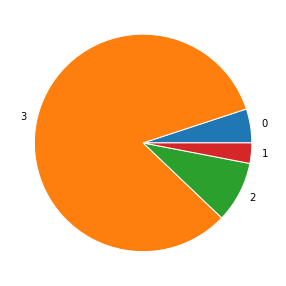

_______
Form10k_68


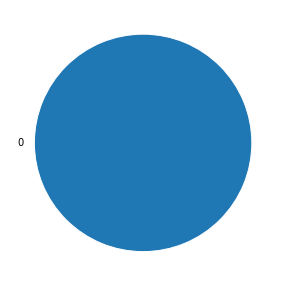

_______
Form10k_73


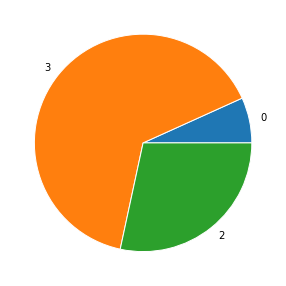

_______
Form10k_74


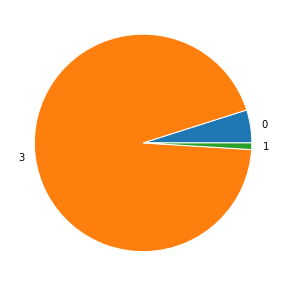

_______
Form10k_75


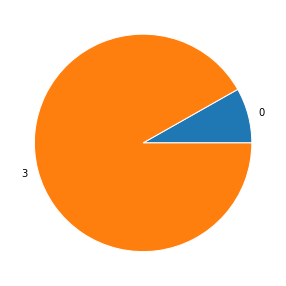

_______


In [69]:
plt.figure(figsize=(20, 40))
row, col = 5, 10
# for i in range(row * col):
#     plt.subplot(col, row, i+1)
#     plt.title(f"target: {target}")
# plt.show()
colors = ["orange", "tomato", "gray", "peru"]

i=0
for name, group in train.groupby(by=['html_id']):
    plt.title(name)
    plt.subplot(col, row, i+1)
    data=group['label'].value_counts()
    data.iloc[0]=5

    plt.pie(data, labels=data.index, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' },colors=colors)
    i=i+1
    
plt.show()
    

In [136]:
df=pd.DataFrame()
catdf=pd.DataFrame()
names=[]
groups=[]
for name, group in train.groupby(by=['html_id']):
#     print(name)
    names.append(name)
    data=group['label'].value_counts()
    groups.append(''.join(map(str, sorted(data.index.tolist())))) 



In [ ]:

catdf['names']=names
catdf['groups']=groups

display(catdf.groupby(by='groups').sum())
for name, group in catdf.groupby(by='groups'):
    print(name)
    print("----------")
    group.sum()
    print(group)
    print("\n")


In [ ]:
valdata1=['Form10k_07','Form10k_01','Form10k_34','Form10k_04','Form10k_08']
valdata2=['Form10k_17','Form10k_12','Form10k_74','Form10k_05','Form10k_22']
valdata3=['Form10k_31','Form10k_15','Form10k_34','Form10k_14','Form10k_23']
valdata4=['Form10k_68','Form10k_38','Form10k_74','Form10k_25','Form10k_24']
valdata5=['Form10k_07','Form10k_55','Form10k_34','Form10k_27','Form10k_30']

<AxesSubplot:xlabel='sid', ylabel='label'>

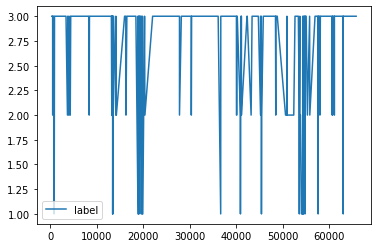

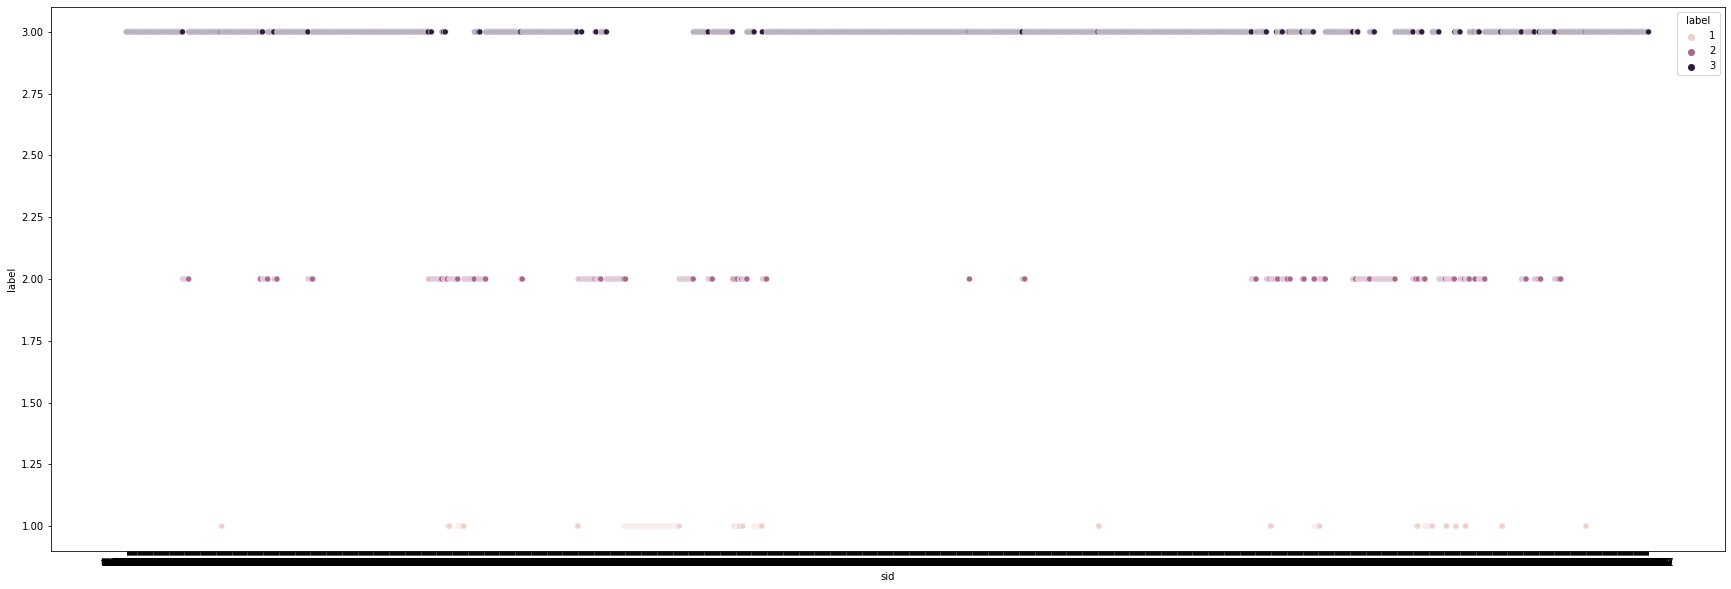

In [163]:
train0=train[train['label']!=0]
plt.figure(figsize=(30,10))
sns.scatterplot(x='sid',y='label',data=train0,hue='label')